In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler
import usefull_funcs
plt.style.use('fivethirtyeight')
sns.set(font_scale= 1)

import warnings
warnings.filterwarnings("ignore")

# Functions

# Preprocessing

### Resampling methods

In [2]:
def rand_undersample(X, y):
    print(f'Value counts before resampling: \n {y.value_counts()}')

    minority_count = y.value_counts()[1]
    rus = RandomUnderSampler(
        random_state=42,
        sampling_strategy = {0 : minority_count}
    )

    X_balanced, y_balanced = rus.fit_sample(X, y)

    print(f'Value counts after resampling: \n {y_balanced.value_counts()}')

    return X_balanced, y_balanced

# try different undersampling algs in imblearn
def near_miss(X, y):
    near_miss = NearMiss(sampling_strategy='majority')
    X_nm, y_nm = near_miss(X, y)

    return X_nm, y_nm


def smote(X, y):
    smote = SMOTE(sampling_strategy='minority', random_state=43)
    X_smote, y_smote = smote.fit_resample(X, y)

    return  X_smote, y_smote


#Data colection
Used just for the first time

In [3]:
# df = pd.read_csv('data/creditcard.csv')
# df

# StratifiedShuffleSplit into train and test/y_true sets
Used just for the first time

In [4]:
# label = 'Class'
# df[label].value_counts()

In [5]:
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in sss.split(df, df[label]):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     train_df = df.loc[train_index]
#     test_df = df.loc[test_index]
#
# print(train_df.shape)
# print(test_df.shape)

In [6]:
# print(train_df.Class.value_counts())
# print(test_df.Class.value_counts())

In [7]:
# train_df.to_csv('data/train_df', index=False)
# test_df.drop(label, 1).to_csv('data/test_df', index=False)
# test_df[label].to_csv('data/test_df_y_true', index=False)


# Missing data

### Reading in trainting data

In [8]:
df = pd.read_csv('data/train_df')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
1,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
2,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
3,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
4,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227845 non-null  float64
 1   V1      227845 non-null  float64
 2   V2      227845 non-null  float64
 3   V3      227845 non-null  float64
 4   V4      227845 non-null  float64
 5   V5      227845 non-null  float64
 6   V6      227845 non-null  float64
 7   V7      227845 non-null  float64
 8   V8      227845 non-null  float64
 9   V9      227845 non-null  float64
 10  V10     227845 non-null  float64
 11  V11     227845 non-null  float64
 12  V12     227845 non-null  float64
 13  V13     227845 non-null  float64
 14  V14     227845 non-null  float64
 15  V15     227845 non-null  float64
 16  V16     227845 non-null  float64
 17  V17     227845 non-null  float64
 18  V18     227845 non-null  float64
 19  V19     227845 non-null  float64
 20  V20     227845 non-null  float64
 21  V21     22

In [10]:
missing_data = df.isnull().sum()
print('Amount of missing data: ')
print(missing_data.sum())

Amount of missing data: 
0


# EDA
todo clustering visualization

In [11]:
# usefull_funcs.hist_for_loop(df)

In [12]:
# usefull_funcs.box_plot_for_loop(df)

<AxesSubplot:>

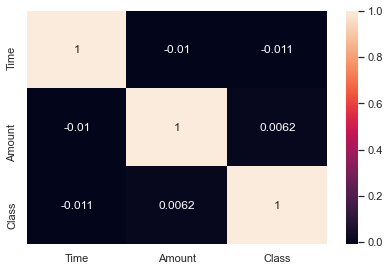

In [13]:
sns.heatmap(df[['Time', 'Amount', 'Class']].corr(), annot=True)

In [14]:
amount_col = df['Amount']
amount_col.describe()

count    227845.000000
mean         88.176298
std         250.722602
min           0.000000
25%           5.640000
50%          22.000000
75%          77.490000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
lower_range, upper_range = usefull_funcs.outlier_treatment(
    amount_col,
    5
)
print(lower_range)
print(upper_range)

-353.61
436.74


In [16]:
outlier_amount_df = df[df['Amount'] > upper_range]
outlier_amount_df['Class'].value_counts()

0    8909
1      34
Name: Class, dtype: int64

In [17]:
outlier_amount_df[outlier_amount_df['Class'] == 1].sort_values(
    by='Amount'
)
# todo try removing outliers or applying tranformation(log, sqrt, bc) in amount during testing

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169316,57027.0,-2.335655,2.225380,-3.379450,2.178538,-3.568264,0.316814,-1.734948,1.449139,-1.980033,...,0.785540,0.297412,0.308536,-0.598416,-0.121850,-0.491018,0.701606,0.206966,444.17,1
223648,87202.0,-0.419820,-1.155978,-2.092516,2.786750,0.736297,-0.167292,1.600027,-0.117427,-0.796954,...,0.480640,0.533517,1.284645,0.516131,-0.602941,-0.305024,-0.021363,0.129096,451.27,1
36700,60353.0,-3.975216,0.581573,-1.880372,4.319241,-3.024330,1.240793,-1.909559,0.660718,-2.752611,...,0.578984,1.397311,1.045322,-0.304000,0.005295,0.235435,0.962015,-0.673557,454.82,1
89147,41227.0,-9.001351,6.613284,-12.423635,7.519929,-10.266255,-2.113208,-9.984287,5.541941,-7.383705,...,1.775891,-1.224758,0.082594,0.452089,0.463827,-0.296928,0.526506,-0.450890,459.07,1
15381,132086.0,-0.361428,1.133472,-2.971360,-0.283073,0.371452,-0.574680,4.031513,-0.934398,-0.768255,...,0.110815,0.563861,-0.408436,-0.880079,1.408392,-0.137402,-0.001250,-0.182751,480.72,1
47446,84204.0,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1
143273,67571.0,-0.758469,-0.045410,-0.168438,-1.313275,-1.901763,0.739433,3.071892,-0.483422,0.618203,...,0.042619,0.397224,0.072229,-0.242276,0.560916,-0.540955,0.150606,-0.117140,549.06,1
76557,94952.0,0.842025,-0.365518,-2.464063,4.820886,0.775505,-0.614785,1.368024,-0.526262,-0.121356,...,-0.110622,-1.257800,-0.324418,-0.420020,-0.219501,-0.268873,-0.144582,0.104464,571.48,1
153683,140308.0,-4.861747,-2.722660,-4.656248,2.502005,-2.008346,0.615422,-3.485680,1.878856,-1.116268,...,1.138876,1.033664,-0.806199,-1.511046,-0.191731,0.080999,1.215152,-0.923142,592.90,1
105812,92102.0,-1.662937,3.253892,-7.040485,2.266456,-4.177649,-0.746925,-0.248337,1.091157,-0.307137,...,0.450381,0.521162,0.308325,-0.318012,-1.255362,-0.691963,0.264878,-0.130445,600.73,1


# Choosing model and sampling method


In [18]:
import time
from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, plot_confusion_matrix
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [19]:
label = 'Class'
X = df.drop(label, 1)
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
)

In [20]:
# output already made in /data

# clf = LazyClassifier()
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)
# models

In [21]:
# models.to_csv('data/lazy_cls.csv')

In [25]:
model = QuadraticDiscriminantAnalysis()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv)

print(f'Mean ROC AUC: {np.mean(scores)}' )

Mean ROC AUC: 0.9741837852279357


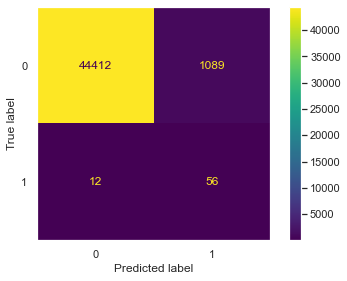

In [26]:
model.fit(X_train, y_train)

plot_confusion_matrix(model, X_test, y_test)
plt.grid(False)

In [27]:
y_pred = model.predict(X_test)

print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')


Recall: 0.8235294117647058
Precision: 0.04890829694323144


Will use QuadraticDiscriminantAnalysis as baseline for testing resampling techniques.
